In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import cv2
import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd drive/MyDrive/CRUPA; ls

ANTON		   colab_MISHA.ipynb  MISHA_heap    NIKITA.ipynb
ANTON_heap	   hard		      MISHA_videos  TimeDistributed.ipynb
ANTON_videos	   main		      model_save    Untitled0.ipynb
colab_ANTON.ipynb  MISHA	      NIKITA


In [ ]:
dir_Nikita = 'drive/MyDrive/CRUPA/main/'
listImg_Nikita = os.listdir(dir_Nikita)
print(listImg_Nikita)

['10_grechka_m3.JPG', '10_grechka_m2.JPG', '20_grechka_m3.JPG', '20_grechka_m1.JPG', '20_grechka_m2.JPG', '10_grechka_m1.JPG', '30_grechka_m1.JPG', '40_grechka_m2.JPG', '40_grechka_m3.JPG', '30_grechka_m3.JPG', '30_grechka_m2.JPG', '50_grechka_m2.JPG', '50_grechka_m3.JPG', '50_grechka_m1.JPG', '40_grechka_m1.JPG', '60_grechka_m3.JPG', '70_grechka_m2.JPG', '70_grechka_m3.JPG', '70_grechka_m1.JPG', '60_grechka_m1.JPG', '60_grechka_m2.JPG', '120_grechka_m2.JPG', '130_grechka_m2.JPG', '80_grechka_m2.JPG', '130_grechka_m3.JPG', '90_grechka_m3.JPG', '120_grechka_m3.JPG', '80_grechka_m3.JPG', '80_grechka_m1.JPG', '90_grechka_m1.JPG', '120_grechka_m1.JPG', '90_grechka_m2.JPG', '130_grechka_m1.JPG', '150_grechka_m3.JPG', '110_grechka_m2.JPG', '110_grechka_m1.JPG', '110_grechka_m3.JPG', '100_grechka_m2.JPG', '100_grechka_m3.JPG', '100_grechka_m1.JPG', '150_grechka_m2.JPG', '150_grechka_m1.JPG', '140_grechka_m3.JPG', '140_grechka_m1.JPG', '140_grechka_m2.JPG', '160_grechka_m2.JPG', '160_grechka_m

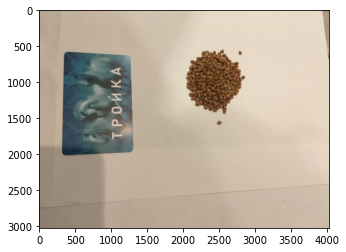

TypeError: ignored

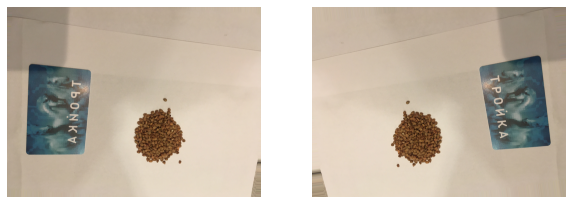

In [ ]:
# for file in listImg_Nikita:
#   img = cv2.imread(dir_Nikita + file)
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   plt.imshow(img)
#   plt.show()
#   break

In [ ]:
dir_ = 'drive/MyDrive/CRUPA/main/'
img_shape = (256, 256)
images = os.listdir(dir_)

images_info_df = pd.DataFrame(columns=['image_name', 'mass', 'food_type'])
for ind, img in enumerate(images):
    items = img.split('_')
    images_info_df.loc[ind] = [dir_ + img, int(items[0]), items[1]]

mass_list = list(images_info_df['mass'])
mass_list = np.array(mass_list)  # массив с массами

images_in_matrix_form = []  # массив с картинками в матричном виде
for img_name in images_info_df['image_name']:
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_shape)
    images_in_matrix_form.append(img)

images_in_matrix_form = np.array(images_in_matrix_form)

KeyboardInterrupt: ignored

In [ ]:
for img in dir_:
  plt.imshow(img)


TypeError: ignored

In [ ]:
def frames_from_video(dir_video = 'drive/MyDrive/CRUPA/ANTON_videos/', file = '10_grechka_av1', video_format = '.mov',
                      dir_frames = 'drive/MyDrive/CRUPA/ANTON_heap/', t0 = 1, frames_number = 6, versions = 1):
    
    """
    Makes 'frames_number' of images from video (saves them in 'dir_frames' directory).
    
    dir_video: directory where video-file is stored (must end with '/'!);
    file: video-file name (without format);
    video_format:  format of video-file;
    dir_frames: directory where frames/images will be saved
    t0: time (in video) of the first frame (in seconds);
    frames_number: desired frames number (number of images that will be saved from video);
    versions: desired number of version (how many different sequences of images will be taken from the same video);
    returns: None.
    """
    
    if not dir_video.endswith('/'):
        raise Exception(f'The directory of video-file ("dir_video") must end with "/"!')

    vidcap = cv2.VideoCapture(dir_video + file + video_format)
    frames_in_vid = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1  # number of frames (in video)
    fps = vidcap.get(cv2.CAP_PROP_FPS)  # frames per second (in video)
    if fps < 1:
        raise Exception(f'Frames per send can not be less than 1!')
    delta_t = round(((frames_in_vid / fps) - t0) / frames_number, 2)  # length of video (in seconds)
    
    for version in range(versions):
        print(f'-----{file}{video_format}: verision #{version}-----')
        time = t0 + 0.2 * version  # time of the frame to be taken (saved)
        count = 0  # image counter (used in the name of the saving image)
        while True:
            vidcap.set(cv2.CAP_PROP_POS_MSEC,(1000 * time))
            success,image = vidcap.read()
            if not success or cv2.waitKey(10) == 27 or time >= (frames_in_vid / fps) - t0:  # exit if Escape is hit or ...
                break
            print(f'Reading a new frame: {success} (left {frames_number - 1 - count} frames)')
            cv2.imwrite(f'{dir_frames}/{file}_ver{version}_frame_{count}.jpg', image)  # save frame/image as JPEG file       
            time += delta_t
            count += 1

In [ ]:
frames_from_video()

Exception: ignored

In [ ]:
input = keras.Input(shape = (img_shape[0], img_shape[1], 3))
x = Conv2D(256, (3,3), padding = 'same', activation='relu') (input)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(512, (3,3), padding = 'same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(256, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(128, (3,3), padding = 'same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(64, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Flatten() (x)

x = Dense(256, activation = 'relu') (x)
x = Dense(64, activation = 'relu') (x)

output = Dense(1, activation='linear') (x)

model = Model(inputs=input, outputs=output)

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 512)     1180160   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 512)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       117990

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
history = model.fit(images_in_matrix_form, mass_list, validation_split=0.2, epochs = 50)

Epoch 1/50
4/4 [==============================] - 360s 88s/step - loss: 119.2355 - accuracy: 0.0000e+00 - val_loss: 145.4397 - val_accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 346s 85s/step - loss: 95.7741 - accuracy: 0.0000e+00 - val_loss: 95.9664 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 344s 86s/step - loss: 79.1207 - accuracy: 0.0000e+00 - val_loss: 49.0670 - val_accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 341s 85s/step - loss: 60.4016 - accuracy: 0.0000e+00 - val_loss: 27.2814 - val_accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 346s 87s/step - loss: 59.0387 - accuracy: 0.0000e+00 - val_loss: 17.9465 - val_accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 352s 87s/step - loss: 52.7287 - accuracy: 0.0000e+00 - val_loss: 10.1977 - val_accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 368s 93s/step - loss: 49.1135 - accuracy: 0.0000

KeyboardInterrupt: ignored

In [ ]:
model.save('drive/MyDrive/CRUPA/model_save/model_v1_1202.h5')

In [ ]:
def img_array(path_img):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_shape)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    return img

def show_img(path_img):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

(1, 256, 256, 3)
20 -true
[[47.457993]] - predict


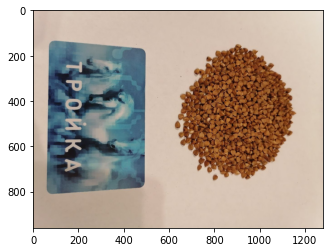

In [ ]:
i = 0
path_img = dir_ + images_info_df['image_name'][i]
pred = model.predict(img_array(path_img))
print(images_info_df['mass'][i], '-true')
print(pred, '- predict')
show_img(path_img)

In [ ]:
#только для 256x256
input = keras.Input(shape = (img_shape[0], img_shape[1], 3))
x = Conv2D(64, (3,3), padding = 'same', activation='relu') (input)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(128, (3,3), padding = 'same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(256, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(512, (3,3), padding = 'same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(512, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(128, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(64, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)

x = Conv2D(64, (3,3), padding = 'same',activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)


output = Dense(1, activation='linear') (x)

model = Model(inputs=input, outputs=output)

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_50 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 64, 256)       2951

In [ ]:
history = model.fit(images_in_matrix_form, mass_list, validation_split=0.2, epochs = 50)

Epoch 1/50
10/10 [==============================] - 190s 19s/step - loss: 106.0182 - accuracy: 0.0000e+00 - val_loss: 138.5943 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 189s 19s/step - loss: 70.9437 - accuracy: 0.0000e+00 - val_loss: 48.3562 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 183s 18s/step - loss: 67.0565 - accuracy: 0.0000e+00 - val_loss: 50.6814 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 183s 18s/step - loss: 65.1947 - accuracy: 0.0000e+00 - val_loss: 70.2467 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 187s 19s/step - loss: 64.2003 - accuracy: 0.0000e+00 - val_loss: 82.1566 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 184s 18s/step - loss: 63.3650 - accuracy: 0.0000e+00 - val_loss: 87.5046 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 182s 18s/step - loss: 64.9518 - ac

In [ ]:
model.save('drive/MyDrive/CRUPA/model_save/model_v2_1202.h5')

NameError: ignored

(1, 256, 256, 3)
110 -true
[[[[129.62462]]]] - predict


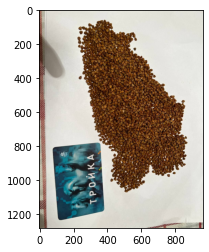

In [ ]:
i = 305
path_img = images_info_df['image_name'][i]
pred = model.predict(img_array(path_img))
print(images_info_df['mass'][i], '-true')
print(pred, '- predict')
show_img(path_img)

In [ ]:
from tensorflow.keras.applications import MobileNet,ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input



In [ ]:
base_model=ResNet50( weights='imagenet',include_top=False,input_shape=(256,256,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3

output=Dense(1,activation='linear')(x) 

model = Model(inputs=base_model.input, outputs=output)


model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
epochs = 50
batch_size = 16

In [ ]:
path = os.path.join('drive/MyDrive/CRUPA/model_save/', f'20210906_1623_v1_e{epochs}_b{batch_size}/')

if not os.path.exists(path):
    os.makedirs(path)

earlystopper = EarlyStopping(patience=15, verbose=1)

filepath = path + 'e{epoch:02d}_val{val_loss:.6f}_acc{accuracy:.4f}_vacc{val_accuracy:.4f}.h5'

tensorboard_dir = os.path.join(path, 'tensorboard')
if not os.path.exists(tensorboard_dir):
    os.makedirs(tensorboard_dir)

tensorboard_callback = TensorBoard(
            log_dir                = tensorboard_dir,
            histogram_freq         = 0,
            batch_size             = batch_size,
            write_graph            = False, # True
            write_grads            = False,
            write_images           = False,
            embeddings_freq        = 0,
            embeddings_layer_names = None,
            embeddings_metadata    = None
)

callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-9, epsilon=0.00001, verbose=1, mode='min'),
        ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, verbose=0),
        tensorboard_callback
]

In [ ]:
history = model.fit(images_in_matrix_form, mass_list, validation_split=0.2, epochs = 30, callbacks = callbacks)

Epoch 1/30
10/10 [==============================] - 252s 25s/step - loss: 14.1468 - accuracy: 0.0000e+00 - val_loss: 48.2367 - val_accuracy: 0.0000e+00 - lr: 1.2500e-04
Epoch 2/30
10/10 [==============================] - 251s 25s/step - loss: 15.9465 - accuracy: 0.0000e+00 - val_loss: 55.0959 - val_accuracy: 0.0000e+00 - lr: 1.2500e-04
Epoch 3/30
10/10 [==============================] - 250s 25s/step - loss: 14.5129 - accuracy: 0.0000e+00 - val_loss: 46.0757 - val_accuracy: 0.0000e+00 - lr: 1.2500e-04
Epoch 4/30
10/10 [==============================] - 250s 25s/step - loss: 14.3804 - accuracy: 0.0000e+00 - val_loss: 52.1210 - val_accuracy: 0.0000e+00 - lr: 1.2500e-04
Epoch 5/30
10/10 [==============================] - 243s 24s/step - loss: 14.3575 - accuracy: 0.0000e+00 - val_loss: 51.9959 - val_accuracy: 0.0000e+00 - lr: 1.2500e-04
Epoch 6/30
10/10 [==============================] - 243s 24s/step - loss: 15.5278 - accuracy: 0.0000e+00 - val_loss: 41.2604 - val_accuracy: 0.0000e+00 - l

In [ ]:
model.save('drive/MyDrive/CRUPA/model_save/model_v3_1302.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
model = keras.models.load_model('drive/MyDrive/CRUPA/model_save/model_v3_1302.h5')

(1, 256, 256, 3)
120 -true
[[117.29243]] - predict


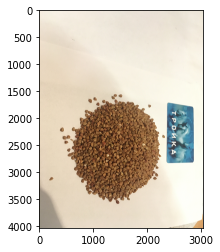

In [ ]:
i = 30
path_img = images_info_df['image_name'][i]
pred = model.predict(img_array(path_img))
print(images_info_df['mass'][i], '-true')
print(pred, '- predict')
show_img(path_img)

(1, 256, 256, 3)
10 -true
[[9.173356]] - predict


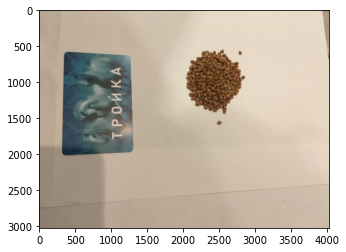

(1, 256, 256, 3)
10 -true
[[9.546424]] - predict


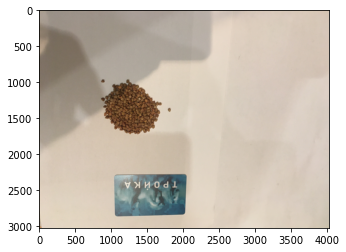

(1, 256, 256, 3)
30 -true
[[28.422941]] - predict


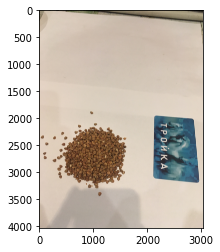

(1, 256, 256, 3)
60 -true
[[57.057636]] - predict


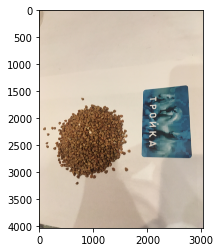

(1, 256, 256, 3)
60 -true
[[57.668648]] - predict


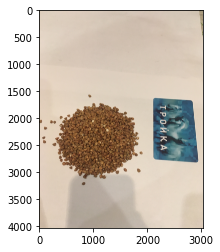

(1, 256, 256, 3)
90 -true
[[86.26781]] - predict


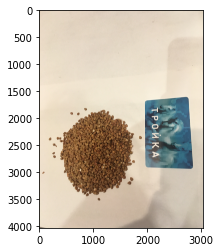

(1, 256, 256, 3)
120 -true
[[117.29243]] - predict


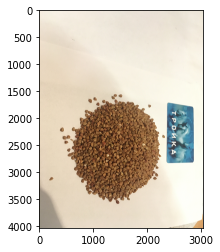

(1, 256, 256, 3)
110 -true
[[105.59523]] - predict


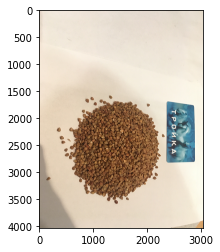

In [ ]:
for i in range(0, 40, 5):
  path_img = images_info_df['image_name'][i]
  pred = model.predict(img_array(path_img))
  print(images_info_df['mass'][i], '-true')
  print(pred, '- predict')
  show_img(path_img)

для теста

In [ ]:
dir_2 = 'drive/MyDrive/CRUPA/hard/grechka_hard/'
img_shape = (256, 256)
images = os.listdir(dir_2)

images_info_df2 = pd.DataFrame(columns=['image_name', 'mass', 'food_type'])
for ind, img in enumerate(images):
    items = img.split('_')
    images_info_df2.loc[ind] = [dir_2 + img, int(items[0]), items[1]]

mass_list2 = list(images_info_df2['mass'])
mass_list2 = np.array(mass_list2)  # массив с массами

images_in_matrix_form2 = []  # массив с картинками в матричном виде
for img_name in images_info_df2['image_name']:
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_shape)
    images_in_matrix_form2.append(img)

images_in_matrix_form2 = np.array(images_in_matrix_form2)

(1, 256, 256, 3)
150 -true
[[193.04022]] - predict


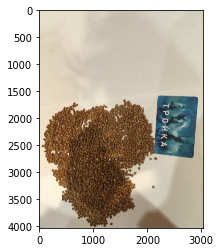

(1, 256, 256, 3)
150 -true
[[160.74744]] - predict


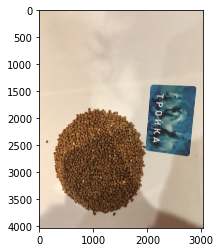

(1, 256, 256, 3)
150 -true
[[115.53212]] - predict


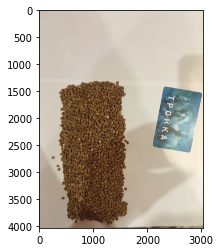

(1, 256, 256, 3)
150 -true
[[211.1476]] - predict


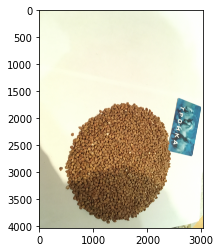

(1, 256, 256, 3)
150 -true
[[202.89432]] - predict


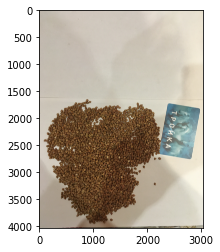

(1, 256, 256, 3)
150 -true
[[112.76981]] - predict


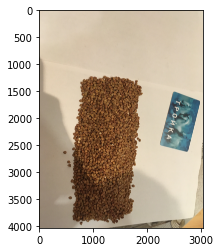

(1, 256, 256, 3)
150 -true
[[217.97495]] - predict


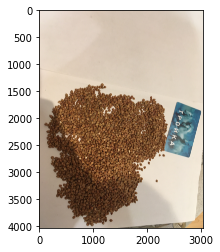

(1, 256, 256, 3)
150 -true
[[97.3095]] - predict


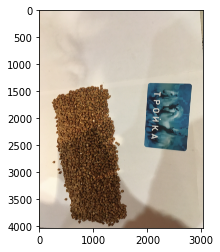

(1, 256, 256, 3)
150 -true
[[231.60309]] - predict


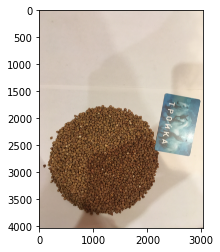

(1, 256, 256, 3)
150 -true
[[173.09729]] - predict


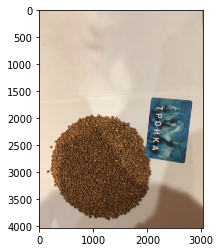

(1, 256, 256, 3)
150 -true
[[143.6768]] - predict


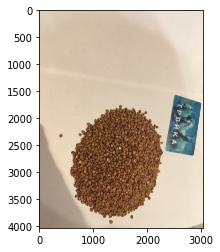

(1, 256, 256, 3)
150 -true
[[125.05288]] - predict


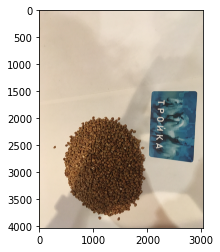

(1, 256, 256, 3)
150 -true
[[189.63507]] - predict


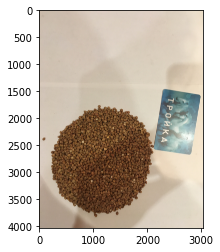

(1, 256, 256, 3)
150 -true
[[128.65768]] - predict


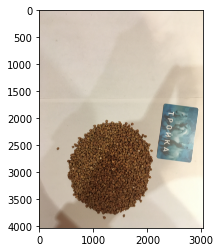

(1, 256, 256, 3)
150 -true
[[180.23935]] - predict


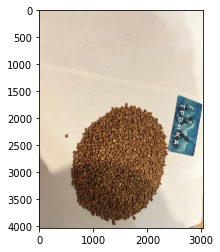

(1, 256, 256, 3)
100 -true
[[271.67554]] - predict


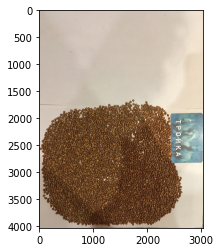

(1, 256, 256, 3)
100 -true
[[240.81961]] - predict


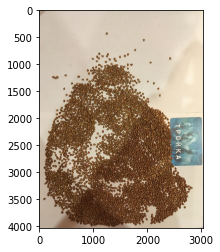

(1, 256, 256, 3)
100 -true
[[158.43759]] - predict


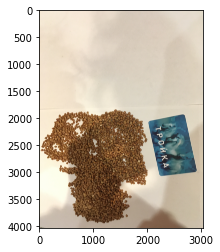

(1, 256, 256, 3)
100 -true
[[89.45027]] - predict


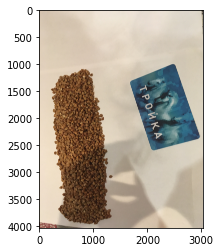

(1, 256, 256, 3)
100 -true
[[277.15417]] - predict


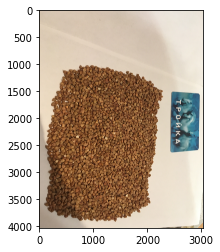

(1, 256, 256, 3)
100 -true
[[151.71219]] - predict


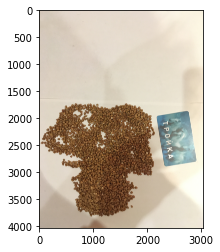

(1, 256, 256, 3)
100 -true
[[213.67255]] - predict


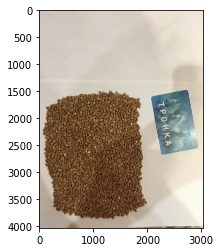

(1, 256, 256, 3)
100 -true
[[183.96259]] - predict


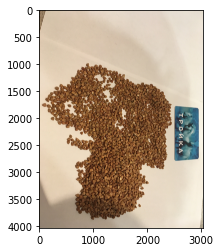

(1, 256, 256, 3)
100 -true
[[181.06815]] - predict


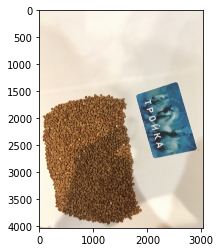

(1, 256, 256, 3)
100 -true
[[82.840294]] - predict


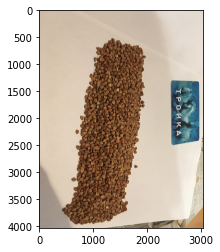

(1, 256, 256, 3)
100 -true
[[93.64465]] - predict


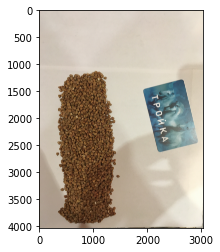

(1, 256, 256, 3)
100 -true
[[192.58101]] - predict


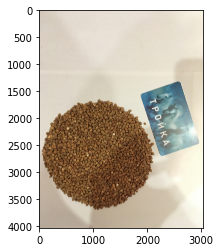

(1, 256, 256, 3)
100 -true
[[184.48657]] - predict


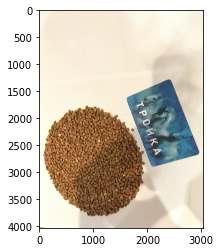

(1, 256, 256, 3)
100 -true
[[207.17839]] - predict


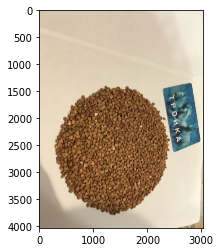

(1, 256, 256, 3)
100 -true
[[111.33465]] - predict


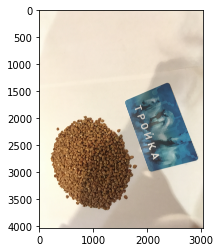

(1, 256, 256, 3)
100 -true
[[149.49641]] - predict


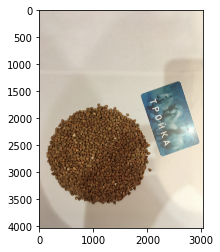

(1, 256, 256, 3)
100 -true
[[159.79274]] - predict


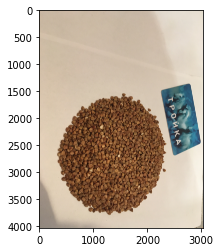

(1, 256, 256, 3)
100 -true
[[137.05493]] - predict


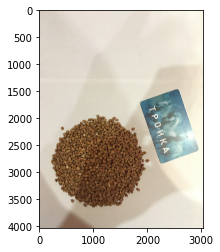

(1, 256, 256, 3)
100 -true
[[139.10413]] - predict


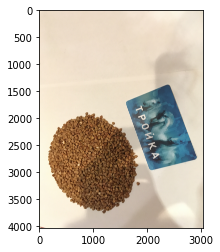

(1, 256, 256, 3)
100 -true
[[129.70917]] - predict


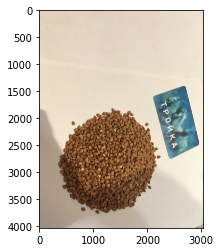

(1, 256, 256, 3)
50 -true
[[180.3957]] - predict


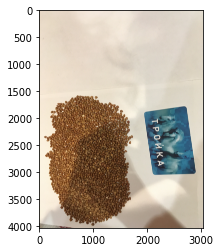

(1, 256, 256, 3)
50 -true
[[71.353325]] - predict


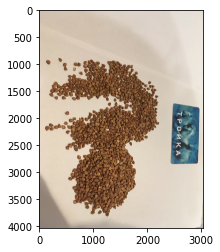

(1, 256, 256, 3)
50 -true
[[92.043724]] - predict


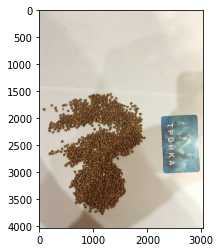

(1, 256, 256, 3)
50 -true
[[233.76213]] - predict


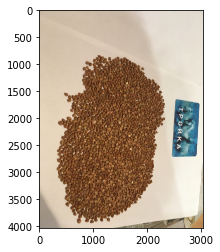

(1, 256, 256, 3)
50 -true
[[192.62045]] - predict


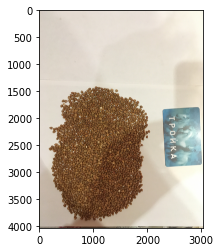

(1, 256, 256, 3)
50 -true
[[74.13131]] - predict


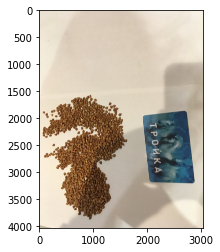

(1, 256, 256, 3)
50 -true
[[137.34724]] - predict


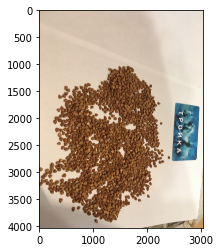

(1, 256, 256, 3)
50 -true
[[136.27171]] - predict


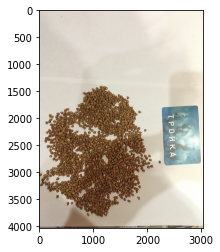

(1, 256, 256, 3)
50 -true
[[69.193436]] - predict


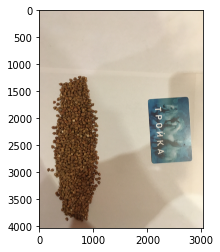

(1, 256, 256, 3)
50 -true
[[51.457165]] - predict


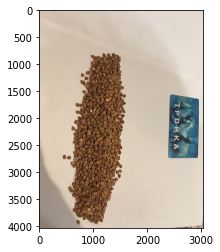

(1, 256, 256, 3)
50 -true
[[52.6082]] - predict


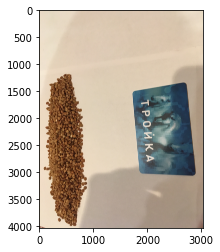

(1, 256, 256, 3)
50 -true
[[120.45269]] - predict


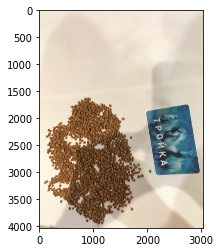

(1, 256, 256, 3)
50 -true
[[67.50691]] - predict


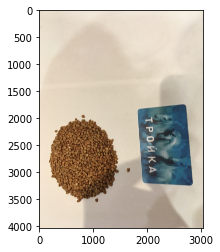

(1, 256, 256, 3)
50 -true
[[153.99574]] - predict


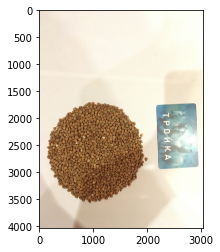

(1, 256, 256, 3)
50 -true
[[88.37293]] - predict


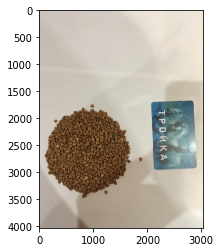

(1, 256, 256, 3)
50 -true
[[127.20663]] - predict


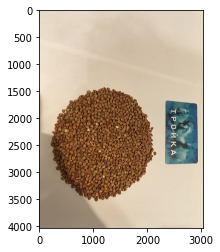

(1, 256, 256, 3)
50 -true
[[124.70034]] - predict


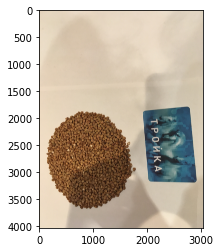

(1, 256, 256, 3)
50 -true
[[81.89068]] - predict


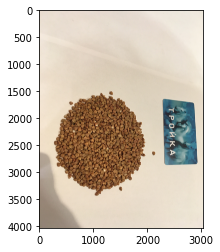

(1, 256, 256, 3)
50 -true
[[67.81888]] - predict


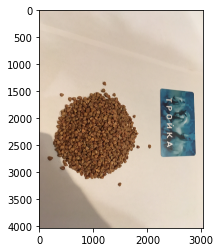

(1, 256, 256, 3)
50 -true
[[64.879425]] - predict


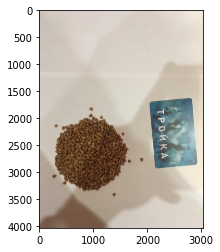

(1, 256, 256, 3)
50 -true
[[51.91641]] - predict


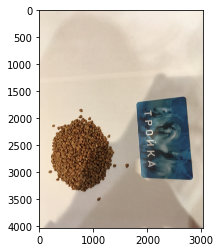

In [ ]:
y_pred = []
y_true = []
for i in range(0, 56, 1):
  path_img = images_info_df2['image_name'][i]
  pred = model.predict(img_array(path_img))
  y_pred.append(pred)
  y_true.append(images_info_df2['mass'][i])
  print(images_info_df2['mass'][i], '-true')
  print(pred, '- predict')
  show_img(path_img)
  

In [ ]:

df = pd.DataFrame({'y_predict':y_pred, 'y_true':y_true})


In [ ]:
df.head()

y_predict  y_true
0  [[193.04022]]     150
1  [[160.74744]]     150
2  [[115.53212]]     150
3   [[211.1476]]     150
4  [[202.89432]]     150

In [ ]:
df.to_csv('drive/MyDrive/table1.csv')